In [13]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from EDMtoolkit import *
from modelSystems import *

## Linear System Test for Supplement

In [2]:
A = np.array([[1,0,-1],
              [1,2,1],
              [0,-3,2]])

la.inv(A)

array([[ 0.7,  0.3,  0.2],
       [-0.2,  0.2, -0.2],
       [-0.3,  0.3,  0.2]])

A = [[ 1  1]
 [-2 -1]] 
 Eigval = [-0.+1.j -0.-1.j] 
 Eigvecs = 
[[-0.4082-0.4082j -0.4082+0.4082j]
 [ 0.8165+0.j      0.8165-0.j    ]]
[[ 0.6258 -0.6242]
 [-0.6242  1.2508]]


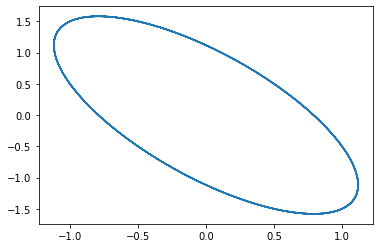

In [6]:
d = 2
tlen = 300
end = 8 * np.pi

t = np.linspace(0, end, num=tlen)
t0 = np.ones(d) * 0.5

"""
A = np.zeros((3,3))
for i in range(d):
    for j in range(i,d):
        r = (np.random.rand() - 0.5) / 8
        A[i,j] = r
        A[j,i] = r

A[0,0] = 1
A[0,1] = 1
A[0,2] = 1        
"""
# a=5
# A = np.array([[1,a],[-a,1]])

# A = np.array([[-0.34697826, -0.31593745, 0.02486731], [ 0.21653342, -0.41345191, 0.37377893],[ 0.10522816, -0.2791675,  -0.05924747]])
A = np.array([[1,1],[-2,-1]]) # Friendly Circular Matrix
# A = np.array([[1,1,1],[5,6,3],[0.5,0.1,-2.2]])
# A = np.random.rand(d,d) - 0.5
# theta = 1.0*np.pi / 3.0 # rotation matrix
# A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

np.set_printoptions(precision=4, suppress=True)
print("A = {a} \n Eigval = {va} \n Eigvecs = \n{ve}".format(a=A, va=la.eig(A)[0],ve=la.eig(A)[1]))

def linsys(xi, ti):
    return A @ xi #c + np.sin(ti)

# Continuous
sys = odeint(linsys, t0, t)
# print(sys)
"""# Discrete
sys = np.ones((tlen,d)) * 0.5
for i in range(tlen-1):
    sys[i+1] = A @ sys[i] + np.cos(i)
"""
    
print(np.cov(sys,rowvar=False))
    
figLin = plt.figure()
plt.plot(sys[:,0],sys[:,1])
#axLin = plt.axes(projection="3d")
#axLin.plot(sys[:,0],sys[:,1],sys[:,2])
plt.show()

In [7]:
print(la.eig(np.array([[0.5,0],[0.5,0]])))
print(la.eig(np.array([[1,1],[-2,-1]])))
print(la.eig(np.array([[1,-1],[-1,2]])))

(array([0. , 0.5]), array([[0.    , 0.7071],
       [1.    , 0.7071]]))
(array([-0.+1.j, -0.-1.j]), array([[-0.4082-0.4082j, -0.4082+0.4082j],
       [ 0.8165+0.j    ,  0.8165-0.j    ]]))
(array([0.382, 2.618]), array([[-0.8507,  0.5257],
       [-0.5257, -0.8507]]))


# Linear Different Nonstationarity Types


In [66]:
A = lambda theta: np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
length = 200
E_max = 8

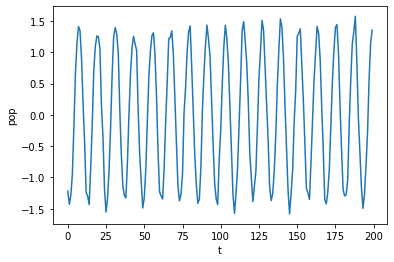

In [67]:
# Stationary

theta = lambda t: np.pi / 6 # (0.5+t)*np.pi/6

X = np.zeros((length,2))
init = np.exp(2*np.pi*rand.uniform(0,1)*1j)
X[0] = (2 ** 0.5) * np.array([init.real, init.imag]) # rand.normal(2)

for i in range(length-1):
    t = i / (length-1)
    X[i+1] = (A(theta(t)) @ X[i]) # + rand.normal(0,pro_noise,2)

ts = X[:,0] + rand.normal(0, 0.1, length)
    
# return standardize(ts) if ns else standardize(ts)
plotTS(ts)

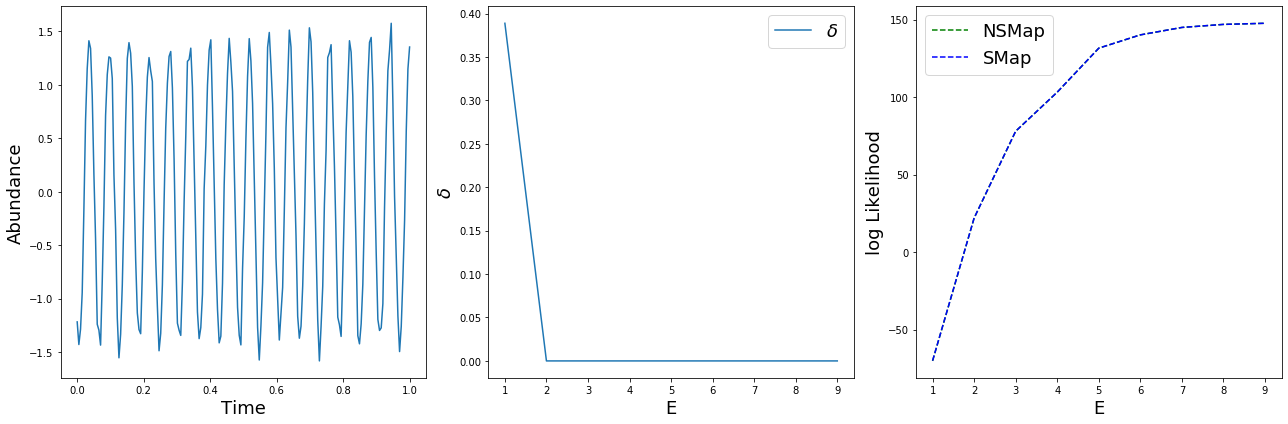

delta = 0.03827519184539361, theta = 0.9407039908188656, r_sqrd = 0.9883141243939697


In [68]:
delta, theta, r_sqrd = get_delta_agg(ts, E_max, return_forecast_skill=True)
print(f"delta = {delta}, theta = {theta}, r_sqrd = {r_sqrd}")

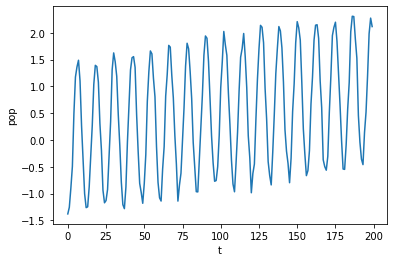

In [69]:
# Mean Change

theta = lambda t: np.pi / 6 # (0.5+t)*np.pi/6

X = np.zeros((length,2))
init = np.exp(2*np.pi*rand.uniform(0,1)*1j)
X[0] = (2 ** 0.5) * np.array([init.real, init.imag]) # rand.normal(2)

for i in range(length-1):
    t = i / (length-1)
    X[i+1] = (A(theta(t)) @ X[i]) # + rand.normal(0,pro_noise,2)

ts = X[:,0] + np.linspace(0,1,num=length) + rand.normal(0, 0.1, length)
    
# return standardize(ts) if ns else standardize(ts)
plotTS(ts)

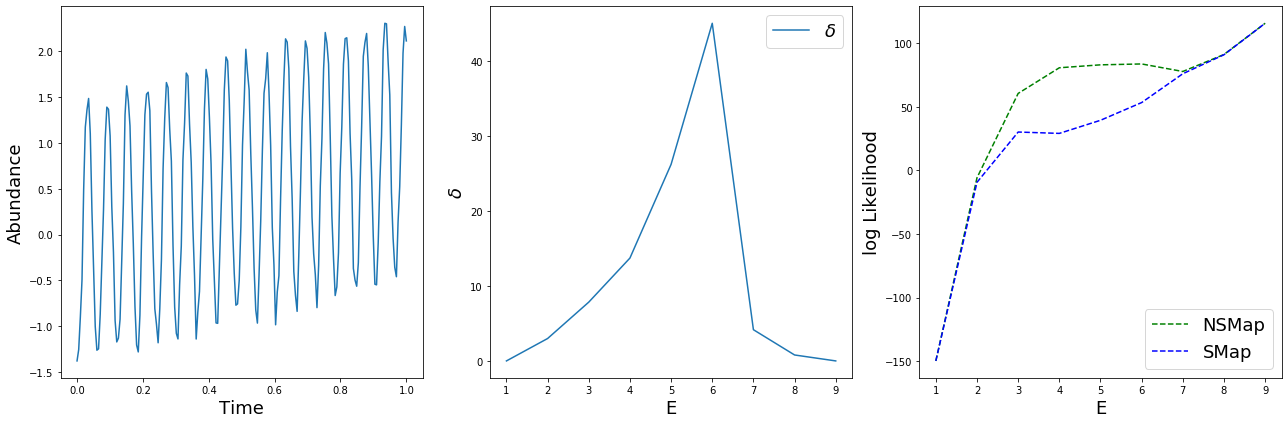

delta = 13.711682970295797, theta = 0.0, r_sqrd = 0.9849955518524316


In [70]:
delta, theta, r_sqrd = get_delta_agg(ts, E_max, return_forecast_skill=True)
print(f"delta = {delta}, theta = {theta}, r_sqrd = {r_sqrd}")

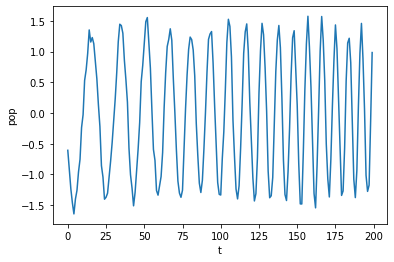

In [71]:
# Speed Change

theta = lambda t: (0.5+t)*np.pi/6

X = np.zeros((length,2))
init = np.exp(2*np.pi*rand.uniform(0,1)*1j)
X[0] = (2 ** 0.5) * np.array([init.real, init.imag]) # rand.normal(2)

for i in range(length-1):
    t = i / (length-1)
    X[i+1] = (A(theta(t)) @ X[i]) # + rand.normal(0,pro_noise,2)

ts = X[:,0] + rand.normal(0, 0.1, length)
    
# return standardize(ts) if ns else standardize(ts)
plotTS(ts)

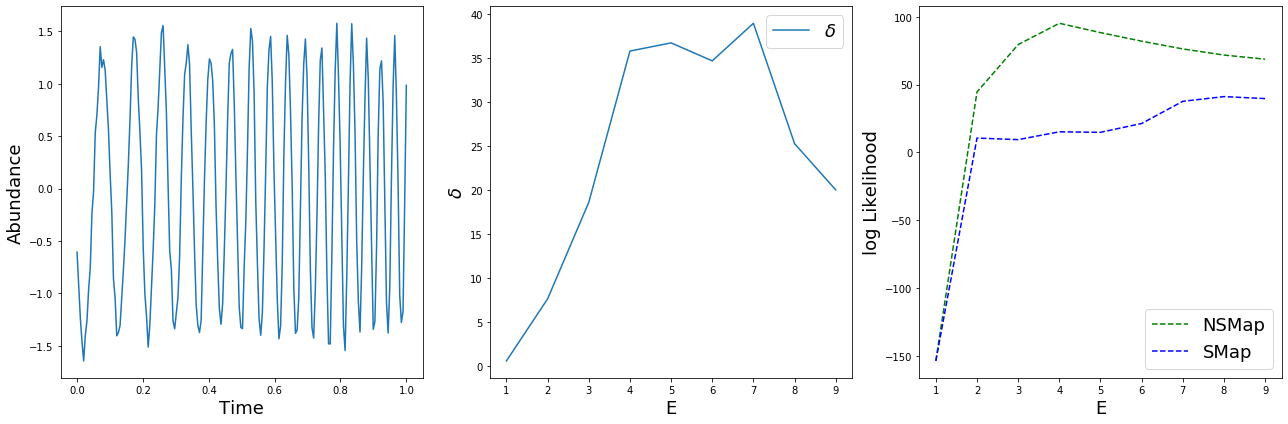

delta = 35.794792715565926, theta = 0.0, r_sqrd = 0.9806328864380149


In [72]:
delta, theta, r_sqrd = get_delta_agg(ts, E_max, return_forecast_skill=True)
print(f"delta = {delta}, theta = {theta}, r_sqrd = {r_sqrd}")

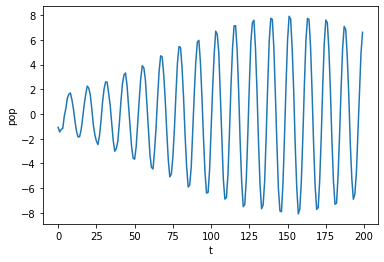

In [80]:
# Variance Change

theta = lambda t: np.pi/6

X = np.zeros((length,2))
init = np.exp(2*np.pi*rand.uniform(0,1)*1j)
X[0] = (2 ** 0.5) * np.array([init.real, init.imag]) # rand.normal(2)

for i in range(length-1):
    t = i / (length-1)
    X[i+1] = (((1 + (0.75 - t) * 2 ** -5) * A(theta(t))) @ X[i]) # + rand.normal(0,pro_noise,2)

ts = X[:,0] + rand.normal(0, 0.1, length)
    
# return standardize(ts) if ns else standardize(ts)
plotTS(ts)

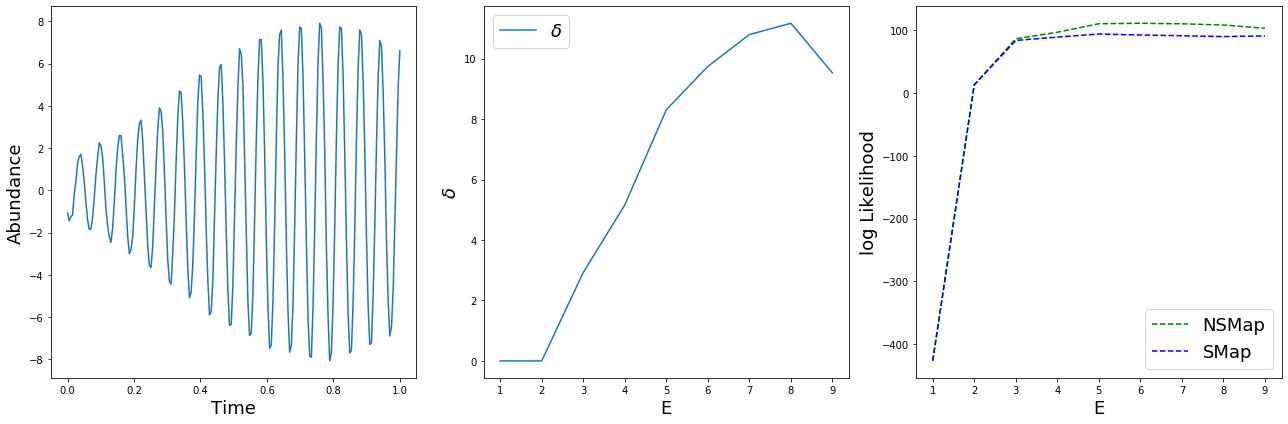

delta = 10.493762976449268, theta = 0.0, r_sqrd = 0.9991643723616135


In [81]:
delta, theta, r_sqrd = get_delta_agg(ts, E_max, return_forecast_skill=True)
print(f"delta = {delta}, theta = {theta}, r_sqrd = {r_sqrd}")